In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [11]:
# Read the Excel files
file_eval1 = 'ChessEval_Evaluator1.xlsx'
file_eval2 = 'ChessEval_Evaluator2.xlsx'
main_df_path = 'Personality and playing chess(1-334)KÓDOLT.csv'
# Relevant data starts from row 3
eval1 = pd.read_excel(file_eval1, skiprows=2)
eval2 = pd.read_excel(file_eval2, skiprows=2)

In [12]:
# Inspect and preprocess the first evaluator's data
eval1 = eval1.drop('Unnamed: 16', axis=1)
eval1 = eval1.drop(0, axis=0)
# Rename the last three columns
eval1.columns.values[-3:] = ['Correctness Total', 'Style Total', 'Thought Process Total']

# Display basic information about the dataset
print("Dataset Overview:")
print(eval1.info())

print("\nFirst 5 Rows of the Dataset:")
display(eval1.head())

# Check for missing values
print("\nMissing Values in Each Column:")
print(eval1.isnull().sum())

# Check for basic statistics
print("\nBasic Statistics:")
print(eval1.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 1 to 269
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         269 non-null    int64  
 1   Correct move               269 non-null    float64
 2   Evaluation                 269 non-null    float64
 3   Key words / move choice    269 non-null    float64
 4   Key words                  269 non-null    float64
 5   Correct move.1             269 non-null    float64
 6   Evaluation.1               269 non-null    float64
 7   Key words / move choice.1  269 non-null    float64
 8   Key words.1                269 non-null    float64
 9   Correct move.2             269 non-null    float64
 10  Evaluation.2               269 non-null    float64
 11  Key words / move choice.2  269 non-null    float64
 12  Key words.2                269 non-null    float64
 13  Correctness Total          269 n

,ID,Correct move,Evaluation,Key words / move choice,Key words,Correct move.1,Evaluation.1,Key words / move choice.1,Key words.1,Correct move.2,Evaluation.2,Key words / move choice.2,Key words.2,Correctness Total,Style Total,Thought Process Total
1,2,3.0,2.0,2.5,-2.5,0.0,1.0,-2.5,-2.5,2.0,3.0,-1.5,-2.5,11.0,-1.5,-7.5
2,3,3.0,2.0,2.5,-2.5,3.0,2.0,-2.5,-2.5,2.0,3.0,2.5,-2.5,15.0,2.5,-7.5
3,4,0.0,0.0,0.0,-2.5,0.0,0.0,2.5,-2.5,2.0,0.0,0.0,-2.5,2.0,2.5,-7.5
4,5,0.0,0.0,1.5,2.5,3.0,2.0,-2.5,-2.5,2.0,3.0,-2.5,-2.5,10.0,-3.5,-2.5
5,6,3.0,2.0,2.5,-2.5,0.0,0.0,2.5,-2.5,2.0,1.0,-2.5,-2.5,8.0,2.5,-7.5



Missing Values in Each Column:
ID                           0
Correct move                 0
Evaluation                   0
Key words / move choice      0
Key words                    0
Correct move.1               0
Evaluation.1                 0
Key words / move choice.1    0
Key words.1                  0
Correct move.2               0
Evaluation.2                 0
Key words / move choice.2    0
Key words.2                  0
Correctness Total            0
Style Total                  0
Thought Process Total        0
dtype: int64

Basic Statistics:
               ID  Correct move  Evaluation  Key words / move choice  \
count  269.000000    269.000000  269.000000               269.000000   
mean   151.565056      1.494424    0.706320                 1.644981   
std     96.977381      1.502786    0.837104                 1.347809   
min      2.000000      0.000000    0.000000                -2.500000   
25%     69.000000      0.000000    0.000000                 1.500000   
50%    1

In [13]:
# Inspct and prerpocess the second evaluator's data
eval2 = eval2.drop('Unnamed: 16', axis=1)
eval2 = eval2.drop(0, axis=0)
# Rename the last three columns
eval2.columns.values[-3:] = ['Correctness Total', 'Style Total', 'Thought Process Total']

# Display basic information about the dataset
print("Dataset Overview:")
print(eval2.info())

print("\nFirst 5 Rows of the Dataset:")
display(eval2.head())

# Check for missing values
print("\nMissing Values in Each Column:")
print(eval2.isnull().sum())

# Check for basic statistics
print("\nBasic Statistics:")
print(eval2.describe())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 1 to 269
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         269 non-null    int64  
 1   Correct move               269 non-null    float64
 2   Evaluation                 269 non-null    float64
 3   Key words / move choice    269 non-null    float64
 4   Key words                  269 non-null    float64
 5   Correct move.1             269 non-null    float64
 6   Evaluation.1               269 non-null    float64
 7   Key words / move choice.1  269 non-null    float64
 8   Key words.1                269 non-null    float64
 9   Correct move.2             269 non-null    float64
 10  Evaluation.2               269 non-null    float64
 11  Key words / move choice.2  269 non-null    float64
 12  Key words.2                269 non-null    float64
 13  Correctness Total          269 n

,ID,Correct move,Evaluation,Key words / move choice,Key words,Correct move.1,Evaluation.1,Key words / move choice.1,Key words.1,Correct move.2,Evaluation.2,Key words / move choice.2,Key words.2,Correctness Total,Style Total,Thought Process Total
1,2,3.0,2.0,2.5,-2.5,0.0,1.0,-2.5,-2.5,2.0,3.0,-1.5,-2.5,11.0,-1.5,-7.5
2,3,3.0,2.0,2.5,-2.5,3.0,2.0,-2.5,-2.5,2.0,3.0,2.5,-2.5,15.0,2.5,-7.5
3,4,0.0,0.0,0.0,-2.5,0.0,0.0,2.5,-2.5,2.0,0.0,0.0,-2.5,2.0,2.5,-7.5
4,5,0.0,0.0,1.5,1.5,3.0,2.0,-2.5,-2.5,2.0,3.0,-2.5,-2.5,10.0,-3.5,-3.5
5,6,3.0,2.0,2.5,-2.5,0.0,0.0,2.5,-2.5,2.0,1.0,-2.5,-2.5,8.0,2.5,-7.5



Missing Values in Each Column:
ID                           0
Correct move                 0
Evaluation                   0
Key words / move choice      0
Key words                    0
Correct move.1               0
Evaluation.1                 0
Key words / move choice.1    0
Key words.1                  0
Correct move.2               0
Evaluation.2                 0
Key words / move choice.2    0
Key words.2                  0
Correctness Total            0
Style Total                  0
Thought Process Total        0
dtype: int64

Basic Statistics:
               ID  Correct move  Evaluation  Key words / move choice  \
count  269.000000    269.000000  269.000000               269.000000   
mean   151.565056      1.494424    0.706320                 1.570632   
std     96.977381      1.502786    0.837104                 1.429510   
min      2.000000      0.000000    0.000000                -2.500000   
25%     69.000000      0.000000    0.000000                 1.000000   
50%    1

In [14]:
eval1

,ID,Correct move,Evaluation,Key words / move choice,Key words,Correct move.1,Evaluation.1,Key words / move choice.1,Key words.1,Correct move.2,Evaluation.2,Key words / move choice.2,Key words.2,Correctness Total,Style Total,Thought Process Total
1,2,3.0,2.0,2.5,-2.5,0.0,1.0,-2.5,-2.5,2.0,3.0,-1.5,-2.5,11.0,-1.5,-7.5
2,3,3.0,2.0,2.5,-2.5,3.0,2.0,-2.5,-2.5,2.0,3.0,2.5,-2.5,15.0,2.5,-7.5
3,4,0.0,0.0,0.0,-2.5,0.0,0.0,2.5,-2.5,2.0,0.0,0.0,-2.5,2.0,2.5,-7.5
4,5,0.0,0.0,1.5,2.5,3.0,2.0,-2.5,-2.5,2.0,3.0,-2.5,-2.5,10.0,-3.5,-2.5
5,6,3.0,2.0,2.5,-2.5,0.0,0.0,2.5,-2.5,2.0,1.0,-2.5,-2.5,8.0,2.5,-7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,329,3.0,2.0,2.5,-2.5,0.0,0.0,0.0,-2.5,0.0,0.0,1.5,-2.5,5.0,4.0,-7.5
266,330,0.0,0.0,0.0,-2.5,0.0,0.0,-2.5,-2.5,0.0,0.0,0.0,0.0,0.0,-2.5,-5.0
267,332,0.0,0.0,2.5,-2.5,0.0,0.0,2.5,-2.5,2.0,0.0,-1.5,-2.5,2.0,3.5,-7.5
268,334,3.0,1.0,2.5,-2.5,0.0,0.0,-2.5,-2.5,2.0,0.0,2.5,-2.5,6.0,2.5,-7.5


In [15]:
# Preprocessing the main dataset
main_df = pd.read_csv(main_df_path, encoding='latin1', delimiter=';')
# Display basic information about the dataset
print("Dataset Overview:")
print(main_df.info())

# Relevant columns for chess ratings
chess_columns = [
    'What is your peak FIDE rating (highest of classical/rapid/blitz)?',
    'What is your current FIDE rating in the same category as your peak (classical/rapid/blitz)?',
    'What is your current online rating (for your most frequently played time control)? If you play on multiple platforms, write your highest rating.'
]
# Rename the columns for clarity
main_df = main_df.rename(columns={
    chess_columns[0]: 'FIDE_peak_rating',
    chess_columns[1]: 'FIDE_current_rating',
    chess_columns[2]: 'Online_rating_current'
})
# Drop columns numbered from 1 to 4
main_df = main_df.drop(main_df.columns[1:5], axis=1)

# Drop rows containing any NA values
main_df_short = main_df.dropna()

# Print the number of remaining rows after dropping NA values
print("\nNumber of rows remaining after dropping NA values:", len(main_df_short))



# Step 1: Create missing value flags
main_df['FIDE_peak_rating_missing'] = main_df['FIDE_peak_rating'].isna().astype(int)
main_df['FIDE_current_rating_missing'] = main_df['FIDE_current_rating'].isna().astype(int)
main_df['Online_rating_missing'] = main_df['Online_rating_current'].isna().astype(int)

# Step 2: Cross-fill from other columns if missing
# If FIDE_current is missing, use FIDE_peak
main_df['FIDE_current_rating'] = main_df['FIDE_current_rating'].fillna(main_df['FIDE_peak_rating'])

# If FIDE_peak is missing, use FIDE_current
main_df['FIDE_peak_rating'] = main_df['FIDE_peak_rating'].fillna(main_df['FIDE_current_rating'])

# If Online_rating is missing, use FIDE_current
main_df['Online_rating_current'] = main_df['Online_rating_current'].fillna(main_df['FIDE_current_rating'])

# If FIDE_current still missing use Online_rating
main_df['FIDE_current_rating'] = main_df['FIDE_current_rating'].fillna(main_df['Online_rating_current'])

# If FIDE_peak still missing use updated FIDE_current
main_df['FIDE_peak_rating'] = main_df['FIDE_peak_rating'].fillna(main_df['Online_rating_current'])


# Step 3: Fill remaining (8) missing values with median
# Convert ratings to numeric, handling non-numeric values
main_df['FIDE_peak_rating'] = pd.to_numeric(main_df['FIDE_peak_rating'], errors='coerce')
main_df['FIDE_current_rating'] = pd.to_numeric(main_df['FIDE_current_rating'], errors='coerce')
main_df['Online_rating_current'] = pd.to_numeric(main_df['Online_rating_current'], errors='coerce')

# Now fill missing values with median after conversion
main_df['FIDE_current_rating'] = main_df['FIDE_current_rating'].fillna(main_df['FIDE_current_rating'].median())
main_df['FIDE_peak_rating'] = main_df['FIDE_peak_rating'].fillna(main_df['FIDE_peak_rating'].median())
main_df['Online_rating_current'] = main_df['Online_rating_current'].fillna(main_df['Online_rating_current'].median())


print("\nFirst 5 Rows of the Dataset:")
display(main_df.head())

# Check for missing values
print("\nMissing Values in Each Column:")
# Check if there are any missing values in the dataset
missing_values = main_df.isnull().sum()
print("\nNumber of missing values in each column:")
print(missing_values)
print("\nTotal number of missing values:", missing_values.sum())
print("\nPercentage of missing values:", (missing_values.sum() / (main_df.shape[0] * main_df.shape[1])) * 100, "%")

# Check for basic statistics
print("\nBasic Statistics:")
print(main_df.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Columns: 131 entries, ID to DERS_ossz
dtypes: float64(2), int64(126), object(3)
memory usage: 274.4+ KB
None

Number of rows remaining after dropping NA values: 133

First 5 Rows of the Dataset:


,ID,FIDE_peak_rating,FIDE_current_rating,Online_rating_current,ZKAPQ1,ZKAPQ2,ZKAPQ3,ZKAPQ4,ZKAPQ5,ZKAPQ6,...,MMQref,MMQenero,MMQkapcsossz,MMQkapcsdiszk,MMQbiz,MQQerzdisz,DERS_ossz,FIDE_peak_rating_missing,FIDE_current_rating_missing,Online_rating_missing
0,2,2205.0,2149.0,2180.0,2,1,3,4,2,4,...,40,25,18,10,9,11,43,0,0,0
1,3,2475.0,2420.0,2525.0,1,3,2,3,1,3,...,35,21,19,14,13,11,30,0,0,0
2,4,1200.0,750.0,750.0,1,1,1,3,1,4,...,27,27,17,11,14,6,20,0,0,1
3,5,1349.0,1349.0,1349.0,1,3,1,3,2,2,...,24,28,6,11,11,7,42,1,1,0
4,6,1750.0,1650.0,1780.0,3,2,2,3,3,3,...,31,24,20,12,15,13,51,0,0,0



Missing Values in Each Column:

Number of missing values in each column:
ID                             0
FIDE_peak_rating               0
FIDE_current_rating            0
Online_rating_current          0
ZKAPQ1                         0
                              ..
MQQerzdisz                     0
DERS_ossz                      0
FIDE_peak_rating_missing       0
FIDE_current_rating_missing    0
Online_rating_missing          0
Length: 130, dtype: int64

Total number of missing values: 0

Percentage of missing values: 0.0 %

Basic Statistics:
               ID  FIDE_peak_rating  FIDE_current_rating  \
count  268.000000        268.000000           268.000000   
mean   151.164179       1528.473881          1493.447761   
std     96.935261        428.721000           429.714278   
min      2.000000        100.000000           177.000000   
25%     68.750000       1250.000000          1200.000000   
50%    138.500000       1547.000000          1515.000000   
75%    232.250000       18

In [16]:
main_df

,ID,FIDE_peak_rating,FIDE_current_rating,Online_rating_current,ZKAPQ1,ZKAPQ2,ZKAPQ3,ZKAPQ4,ZKAPQ5,ZKAPQ6,...,MMQref,MMQenero,MMQkapcsossz,MMQkapcsdiszk,MMQbiz,MQQerzdisz,DERS_ossz,FIDE_peak_rating_missing,FIDE_current_rating_missing,Online_rating_missing
0,2,2205.0,2149.0,2180.0,2,1,3,4,2,4,...,40,25,18,10,9,11,43,0,0,0
1,3,2475.0,2420.0,2525.0,1,3,2,3,1,3,...,35,21,19,14,13,11,30,0,0,0
2,4,1200.0,750.0,750.0,1,1,1,3,1,4,...,27,27,17,11,14,6,20,0,0,1
3,5,1349.0,1349.0,1349.0,1,3,1,3,2,2,...,24,28,6,11,11,7,42,1,1,0
4,6,1750.0,1650.0,1780.0,3,2,2,3,3,3,...,31,24,20,12,15,13,51,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,329,1766.0,1766.0,2100.0,4,3,3,3,3,3,...,37,23,21,17,13,16,36,0,0,0
264,330,1338.0,1307.0,1498.0,1,3,1,4,1,3,...,39,30,19,9,9,4,16,0,0,0
265,332,1031.0,1031.0,1031.0,3,2,2,3,1,3,...,41,29,10,23,17,6,31,1,1,0
266,334,1595.0,1595.0,2000.0,4,1,1,3,2,1,...,36,17,12,19,17,16,61,0,0,0


In [17]:
main_df_short

,ID,FIDE_peak_rating,FIDE_current_rating,Online_rating_current,ZKAPQ1,ZKAPQ2,ZKAPQ3,ZKAPQ4,ZKAPQ5,ZKAPQ6,...,ZKASS3,ZKASS4,MMQossz,MMQref,MMQenero,MMQkapcsossz,MMQkapcsdiszk,MMQbiz,MQQerzdisz,DERS_ossz
0,2,2205,2149.0,2180.0,2,1,3,4,2,4,...,7,9,127,40,25,18,10,9,11,43
1,3,2475,2420.0,2525.0,1,3,2,3,1,3,...,8,11,113,35,21,19,14,13,11,30
4,6,1750,1650.0,1780.0,3,2,2,3,3,3,...,9,9,109,31,24,20,12,15,13,51
7,9,2378,2192.0,2324.0,2,3,2,3,2,2,...,10,10,137,42,29,18,11,11,6,26
10,12,1200,1200.0,1789.0,1,2,3,3,3,3,...,12,15,104,37,20,20,18,15,18,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,315,1487,1360.0,1612.0,4,3,1,4,1,2,...,8,7,99,25,17,12,8,12,9,36
261,327,1800,1600.0,1400.0,4,2,2,2,2,3,...,8,12,130,39,25,20,15,9,8,24
263,329,1766,1766.0,2100.0,4,3,3,3,3,3,...,8,11,115,37,23,21,17,13,16,36
264,330,1338,1307.0,1498.0,1,3,1,4,1,3,...,7,10,140,39,30,19,9,9,4,16


In [18]:
# Merging important features into one dataframe (non-imputed/short and imputed/long version)

cols_to_compare = ['ID', 'Correctness Total', 'Style Total', 'Thought Process Total']
eval1_scores = eval1[cols_to_compare].reset_index(drop=True)
eval2_scores = eval2[cols_to_compare].reset_index(drop=True)

# Rename and concat
eval1_scores.columns = [col + '_E1' for col in cols_to_compare]
eval2_scores.columns = [col + '_E2' for col in cols_to_compare]
merged_scores = pd.concat([eval1_scores, eval2_scores], axis=1)

# Calcuating pearson correlation
pearson_results = {
    col: pearsonr(merged_scores[f'{col}_E1'], merged_scores[f'{col}_E2'])[0]
    for col in cols_to_compare
}
print("Pearson results (megbízhatóság a kódolók között)")
display(pearson_results)

# Calculating ICC (Intraclass Correlation Coefficient)
def calculate_icc(data):
    n, k = data.shape
    mean_raters = np.mean(data, axis=1)
    grand_mean = np.mean(data)
    MS_between = np.sum((mean_raters - grand_mean) ** 2) * k / (n - 1)
    MS_within = np.sum((data - mean_raters[:, None]) ** 2) / ((k - 1) * n)
    return (MS_between - MS_within) / (MS_between + (k - 1) * MS_within)

icc_results = {
    col: calculate_icc(merged_scores[[f'{col}_E1', f'{col}_E2']].dropna().to_numpy())
    for col in cols_to_compare
}
print("ICC results:")
display(icc_results)

# Average scores
for col in cols_to_compare:
    merged_scores[col + '_avg'] = merged_scores[[f'{col}_E1', f'{col}_E2']].mean(axis=1)
# Rename ID_E1 to ID
merged_scores = merged_scores.rename(columns={'ID_E1': 'ID'})

chess_columns = [
   'FIDE_peak_rating',
   'FIDE_current_rating',
   'Online_rating_current'
]

psych_columns = [col for col in main_df.columns if col.startswith(('ZKAPQ', 'ZKA', 'MMQ', 'DERS'))]

s
main_cleaned = main_df.iloc[:len(merged_scores)].reset_index(drop=True)
# Select rows based on IDs
merged_scores_short = merged_scores[merged_scores['ID'].isin(main_df_short['ID'])].reset_index(drop=True)

chess_scores = main_cleaned[chess_columns].reset_index(drop=True)
psych_scores = main_cleaned[psych_columns].reset_index(drop=True)

chess_scores_short = main_df_short[chess_columns].reset_index(drop=True)
psych_scores_short = main_df_short[psych_columns].reset_index(drop=True)

# Concat imputed dataframes
merged_df_augmented = pd.concat([
    merged_scores[['ID', 'Correctness Total_avg', 'Style Total_avg', 'Thought Process Total_avg']],
    chess_scores,
    psych_scores
], axis=1)
# Drop last row of merged_df
merged_df_augmented = merged_df_augmented.drop(merged_df_augmented.index[-1])


# Concat non-imputed dataframes
merged_df_short = pd.concat([
    merged_scores_short[['ID', 'Correctness Total_avg', 'Style Total_avg', 'Thought Process Total_avg']],
    chess_scores_short,
    psych_scores_short
], axis=1)

# Save results to CSV
# final_df.to_csv("merged_final_dataset.csv", index=False)


Pearson results (megbízhatóság a kódolók között)


{'ID': np.float64(0.9999999999999999),
 'Correctness Total': np.float64(1.0),
 'Style Total': np.float64(0.9708608973178465),
 'Thought Process Total': np.float64(0.9788883073730668)}

ICC results:


{'ID': np.float64(1.0),
 'Correctness Total': np.float64(1.0),
 'Style Total': np.float64(0.9707327829862601),
 'Thought Process Total': np.float64(0.9786512284126705)}

NameError: name 's' is not defined

In [ ]:
merged_df_augmented

,ID,Correctness Total_avg,Style Total_avg,Thought Process Total_avg,FIDE_peak_rating,FIDE_current_rating,Online_rating_current,ZKAPQ1,ZKAPQ2,ZKAPQ3,...,ZKASS2,ZKASS3,ZKASS4,MMQossz,MMQref,MMQenero,MMQkapcsossz,MMQkapcsdiszk,MMQbiz,DERS_ossz
0,2,11.0,-1.50,-7.5,2205.0,2149.0,2180.0,2.0,1.0,3.0,...,9.0,7.0,9.0,127.0,40.0,25.0,18.0,10.0,9.0,43.0
1,3,15.0,2.50,-7.5,2475.0,2420.0,2525.0,1.0,3.0,2.0,...,12.0,8.0,11.0,113.0,35.0,21.0,19.0,14.0,13.0,30.0
2,4,2.0,2.50,-7.5,1200.0,750.0,750.0,1.0,1.0,1.0,...,12.0,8.0,7.0,116.0,27.0,27.0,17.0,11.0,14.0,20.0
3,5,10.0,-3.50,-3.0,1349.0,1349.0,1349.0,1.0,3.0,1.0,...,9.0,8.0,11.0,107.0,24.0,28.0,6.0,11.0,11.0,42.0
4,6,8.0,2.50,-7.5,1750.0,1650.0,1780.0,3.0,2.0,2.0,...,11.0,9.0,9.0,109.0,31.0,24.0,20.0,12.0,15.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,328,6.0,4.25,-2.5,1766.0,1766.0,2100.0,4.0,3.0,3.0,...,12.0,8.0,11.0,115.0,37.0,23.0,21.0,17.0,13.0,36.0
264,329,5.0,4.75,-7.5,1338.0,1307.0,1498.0,1.0,3.0,1.0,...,15.0,7.0,10.0,140.0,39.0,30.0,19.0,9.0,9.0,16.0
265,330,0.0,-2.50,-5.0,1031.0,1031.0,1031.0,3.0,2.0,2.0,...,8.0,12.0,10.0,114.0,41.0,29.0,10.0,23.0,17.0,31.0
266,332,2.0,3.00,-7.5,1595.0,1595.0,2000.0,4.0,1.0,1.0,...,15.0,15.0,13.0,93.0,36.0,17.0,12.0,19.0,17.0,61.0


In [ ]:
merged_df_short.to_csv("Dataframes/merged_df_short.csv", index=False)
display(merged_df_short)

,ID,Correctness Total_avg,Style Total_avg,Thought Process Total_avg,FIDE_peak_rating,FIDE_current_rating,Online_rating_current,ZKAPQ1,ZKAPQ2,ZKAPQ3,...,ZKASS2,ZKASS3,ZKASS4,MMQossz,MMQref,MMQenero,MMQkapcsossz,MMQkapcsdiszk,MMQbiz,DERS_ossz
0,2,11.0,-1.50,-7.5,2205,2149.0,2180.0,2,1,3,...,9,7,9,127,40,25,18,10,9,43
1,3,15.0,2.50,-7.5,2475,2420.0,2525.0,1,3,2,...,12,8,11,113,35,21,19,14,13,30
2,6,8.0,2.50,-7.5,1750,1650.0,1780.0,3,2,2,...,11,9,9,109,31,24,20,12,15,51
3,9,14.0,-2.50,-7.5,2378,2192.0,2324.0,2,3,2,...,8,10,10,137,42,29,18,11,11,26
4,12,1.0,7.50,-7.5,1200,1200.0,1789.0,1,2,3,...,15,12,15,104,37,20,20,18,15,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,315,4.0,5.00,-5.0,1487,1360.0,1612.0,4,3,1,...,9,8,7,99,25,17,12,8,12,36
129,327,1.0,6.50,-2.5,1800,1600.0,1400.0,4,2,2,...,12,8,12,130,39,25,20,15,9,24
130,329,5.0,4.75,-7.5,1766,1766.0,2100.0,4,3,3,...,12,8,11,115,37,23,21,17,13,36
131,330,0.0,-2.50,-5.0,1338,1307.0,1498.0,1,3,1,...,15,7,10,140,39,30,19,9,9,16


In [ ]:
# Create correlations with p-value from original dataset
# Define target variables (puzzle scores)
target_vars = ['Correctness Total_avg', 'Style Total_avg', 'Thought Process Total_avg']

# Select all numeric columns for correlation analysis
all_vars = merged_df_short.select_dtypes(include=[np.number]).columns.tolist()

# Exclude target variables to avoid self-correlations
predictor_vars = [col for col in all_vars if col not in target_vars]

# Compute Pearson correlation and p-values
correlations = []
for target in target_vars:
    for predictor in predictor_vars:
        r, p = pearsonr(merged_df_short[predictor], merged_df_short[target])
        correlations.append({
            'Predictor': predictor,
            'Target': target,
            'Correlation': r,
            'P-value': p
        })

# Create DataFrame from results
correlation_results_df = pd.DataFrame(correlations)

# Filter to show only statistically significant results
significant_results_df = correlation_results_df[correlation_results_df['P-value'] < 0.05]

In [ ]:
# Show correlation results
correlation_results_df.to_csv("Dataframes/correlation_results_from_original.csv", index=False)
display(correlation_results_df)

,Predictor,Target,Correlation,P-value
0,ID,Correctness Total_avg,0.125654,1.495430e-01
1,FIDE_current_rating,Correctness Total_avg,0.583328,1.733259e-13
2,Online_rating_current,Correctness Total_avg,0.578330,3.102314e-13
3,ZKAPQ1,Correctness Total_avg,-0.065923,4.509047e-01
4,ZKAPQ2,Correctness Total_avg,-0.102150,2.420054e-01
...,...,...,...,...
370,MMQenero,Thought Process Total_avg,0.171071,4.897603e-02
371,MMQkapcsossz,Thought Process Total_avg,-0.065928,4.508712e-01
372,MMQkapcsdiszk,Thought Process Total_avg,-0.200546,2.063802e-02
373,MMQbiz,Thought Process Total_avg,-0.123471,1.567983e-01


In [ ]:
# Show significant results
significant_results_df.to_csv("Dataframes/significant_correlation_results_from_original.csv", index=False)
display(len(significant_results_df))
significant_results_df

41

,Predictor,Target,Correlation,P-value
1,FIDE_current_rating,Correctness Total_avg,0.583328,1.733259e-13
2,Online_rating_current,Correctness Total_avg,0.578330,3.102314e-13
24,ZKAPQ22,Correctness Total_avg,-0.200508,2.066265e-02
26,ZKAPQ24,Correctness Total_avg,-0.193692,2.549090e-02
31,ZKAPQ29,Correctness Total_avg,0.238603,5.678446e-03
42,ZKAPQ40,Correctness Total_avg,0.172038,4.769256e-02
51,ZKAPQ49,Correctness Total_avg,0.186444,3.165324e-02
55,ZKAPQ53,Correctness Total_avg,-0.233075,6.936789e-03
64,ZKAPQ62,Correctness Total_avg,-0.171738,4.808716e-02
70,ZKAPQ68,Correctness Total_avg,-0.218108,1.166750e-02


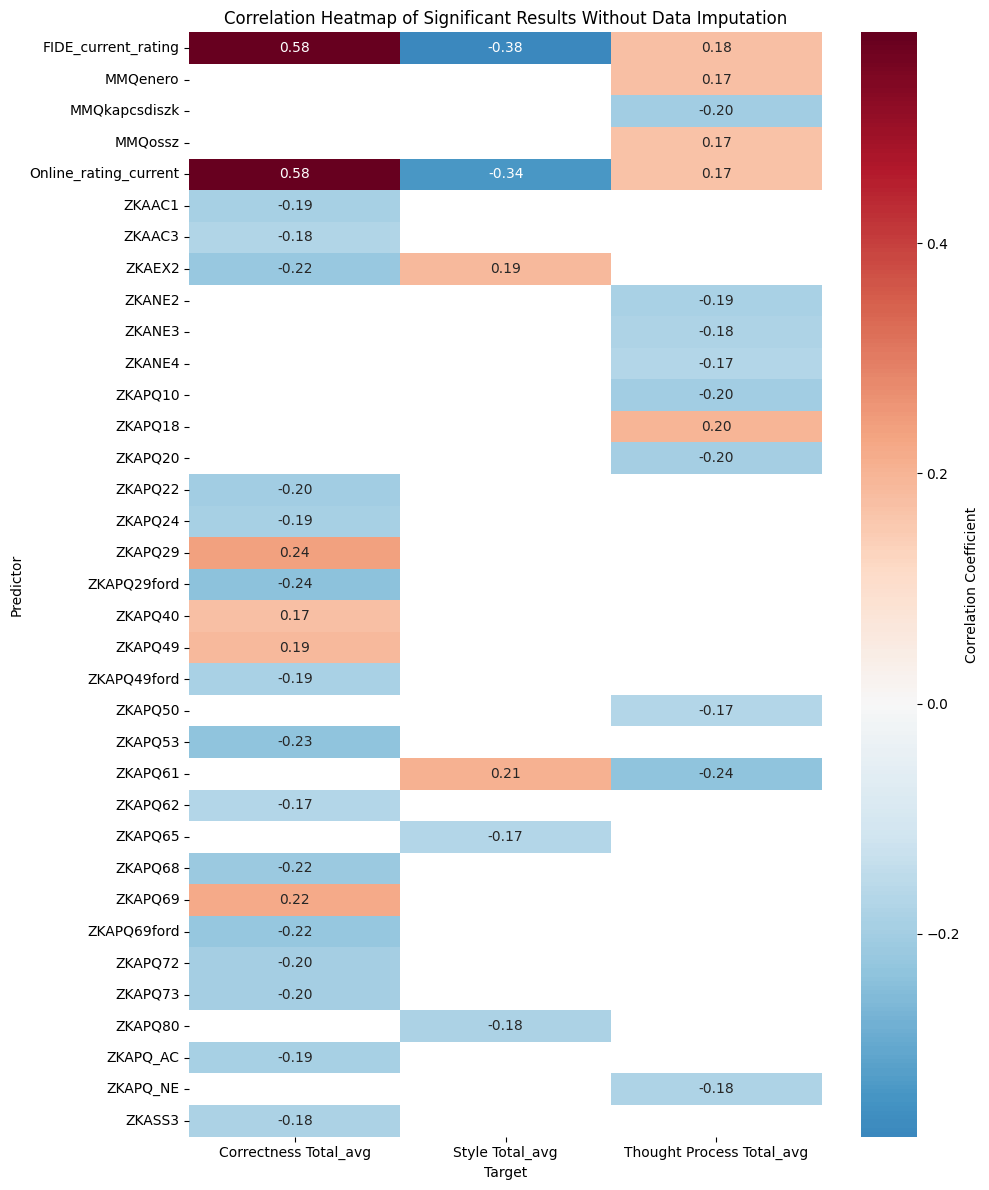

In [ ]:
pivot_df = pd.pivot_table(significant_results_df, 
                         values='Correlation',
                         index='Predictor', 
                         columns='Target')

# Create heatmap using seaborn
plt.figure(figsize=(10, 12))
sns.heatmap(pivot_df, 
            annot=True, 
            cmap='RdBu_r',
            center=0,
            fmt='.2f',
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Heatmap of Significant Results Without Data Imputation')
plt.tight_layout()
plt.savefig('Figures/correlation_heatmap_significant_results_original.png')
plt.show()

In [ ]:
# Create correlations with p-value from augmented dataset
# Define target variables (puzzle scores)
target_vars = ['Correctness Total_avg', 'Style Total_avg', 'Thought Process Total_avg']

# Select all numeric columns for correlation analysis
all_vars = merged_df_augmented.select_dtypes(include=[np.number]).columns.tolist()

# Exclude target variables to avoid self-correlations
predictor_vars = [col for col in all_vars if col not in target_vars]

# Compute Pearson correlation and p-values
correlations = []
for target in target_vars:
    for predictor in predictor_vars:
        r, p = pearsonr(merged_df_augmented[predictor], merged_df_augmented[target])
        correlations.append({
            'Predictor': predictor,
            'Target': target,
            'Correlation': r,
            'P-value': p
        })

# Create DataFrame from results
correlation_results_aug_df = pd.DataFrame(correlations)

# Filter to show only statistically significant results
significant_results_aug_df = correlation_results_aug_df[correlation_results_aug_df['P-value'] < 0.05]

In [ ]:
# Show correlation results
correlation_results_aug_df

,Predictor,Target,Correlation,P-value
0,ID,Correctness Total_avg,0.015952,7.949107e-01
1,FIDE_peak_rating,Correctness Total_avg,0.355813,2.034641e-09
2,FIDE_current_rating,Correctness Total_avg,0.365005,7.213098e-10
3,Online_rating_current,Correctness Total_avg,0.378327,1.512145e-10
4,ZKAPQ1,Correctness Total_avg,-0.060468,3.240480e-01
...,...,...,...,...
373,MMQenero,Thought Process Total_avg,0.059083,3.352731e-01
374,MMQkapcsossz,Thought Process Total_avg,-0.002224,9.710978e-01
375,MMQkapcsdiszk,Thought Process Total_avg,-0.144000,1.834047e-02
376,MMQbiz,Thought Process Total_avg,-0.128647,3.529504e-02


In [ ]:
# Show significant results
significant_results_aug_df.to_csv("Dataframes/significant_correlation_results_from_augmented.csv", index=False)
display(len(significant_results_aug_df))
significant_results_aug_df

46

,Predictor,Target,Correlation,P-value
1,FIDE_peak_rating,Correctness Total_avg,0.355813,2.034641e-09
2,FIDE_current_rating,Correctness Total_avg,0.365005,7.213098e-10
3,Online_rating_current,Correctness Total_avg,0.378327,1.512145e-10
14,ZKAPQ11,Correctness Total_avg,-0.121080,4.768177e-02
15,ZKAPQ12,Correctness Total_avg,-0.154725,1.119962e-02
31,ZKAPQ28,Correctness Total_avg,-0.120594,4.858946e-02
47,ZKAPQ44,Correctness Total_avg,-0.131901,3.087606e-02
56,ZKAPQ53,Correctness Total_avg,-0.132861,2.966649e-02
64,ZKAPQ61,Correctness Total_avg,-0.123377,4.358586e-02
95,ZKAPQ_AC,Correctness Total_avg,-0.122203,4.564155e-02


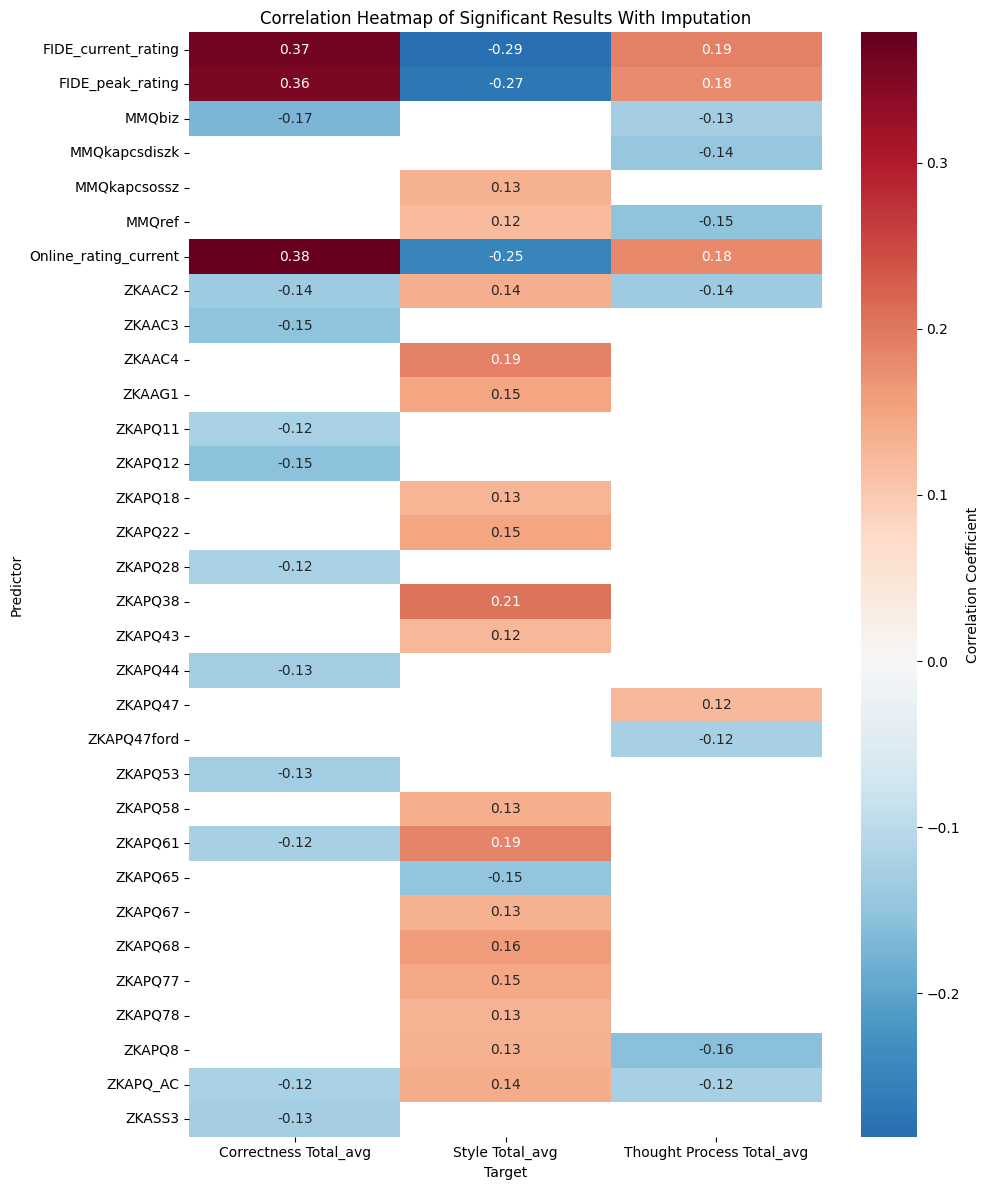

In [ ]:
pivot_df = pd.pivot_table(significant_results_aug_df, 
                         values='Correlation',
                         index='Predictor', 
                         columns='Target')

# Create heatmap using seaborn
plt.figure(figsize=(10, 12))
sns.heatmap(pivot_df, 
            annot=True, 
            cmap='RdBu_r',
            center=0,
            fmt='.2f',
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Heatmap of Significant Results With Imputation')
plt.tight_layout()
plt.savefig('Figures/correlation_heatmap_significant_results_augmented.png')
plt.show()

In [ ]:
# USE ALL FEATURES from eval 1 and eval 2 as well!!!

cols_to_compare = eval1.columns.tolist()
print(cols_to_compare)
eval1_scores = eval1[cols_to_compare].reset_index(drop=True)
eval2_scores = eval2[cols_to_compare].reset_index(drop=True)

# Renaming columns to avoid confusion and merge
eval1_scores.columns = [col + '_E1' for col in cols_to_compare]
eval2_scores.columns = [col + '_E2' for col in cols_to_compare]
merged_scores = pd.concat([eval1_scores, eval2_scores], axis=1)


# Average scores for each column
for col in cols_to_compare:
    if col != 'ID':
        merged_scores[col + '_avg'] = merged_scores[[f'{col}_E1', f'{col}_E2']].mean(axis=1)

# Rename ID_E1 to ID
merged_scores = merged_scores.rename(columns={'ID_E1': 'ID'})

chess_columns = ['FIDE_peak_rating', 'FIDE_current_rating', 'Online_rating_current']
psych_columns = [col for col in main_df.columns if col.startswith(('ZKAPQ', 'ZKA', 'MMQ', 'DERS'))]

main_cleaned = main_df.iloc[:len(merged_scores)].reset_index(drop=True)
chess_scores = main_cleaned[chess_columns].reset_index(drop=True)
psych_scores = main_cleaned[psych_columns].reset_index(drop=True)


merged_scores_short = merged_scores[merged_scores['ID'].isin(main_df_short['ID'])].reset_index(drop=True)
# Create a new DataFrame for chess and psych scores
chess_scores = main_cleaned[chess_columns].reset_index(drop=True)
psych_scores = main_cleaned[psych_columns].reset_index(drop=True)

chess_scores_short = main_df_short[chess_columns].reset_index(drop=True)
psych_scores_short = main_df_short[psych_columns].reset_index(drop=True)

# Construct final merged_df_all_features
merged_df_all_features = pd.concat(
    [merged_scores_short[['ID'] + [col + '_avg' for col in cols_to_compare if col != 'ID']],
     chess_scores_short,
     psych_scores_short], axis=1)

['ID', 'Correct move', 'Evaluation', 'Key words / move choice', 'Key words', 'Correct move.1', 'Evaluation.1', 'Key words / move choice.1', 'Key words.1', 'Correct move.2', 'Evaluation.2', 'Key words / move choice.2', 'Key words.2', 'Correctness Total', 'Style Total', 'Thought Process Total']


In [ ]:
merged_df_all_features.to_csv("Dataframes/merged_df_all_features.csv", index=False)
merged_df_all_features

,ID,Correct move_avg,Evaluation_avg,Key words / move choice_avg,Key words_avg,Correct move.1_avg,Evaluation.1_avg,Key words / move choice.1_avg,Key words.1_avg,Correct move.2_avg,...,ZKASS2,ZKASS3,ZKASS4,MMQossz,MMQref,MMQenero,MMQkapcsossz,MMQkapcsdiszk,MMQbiz,DERS_ossz
0,2,3.0,2.0,2.5,-2.5,0.0,1.0,-2.50,-2.5,2.0,...,9,7,9,127,40,25,18,10,9,43
1,3,3.0,2.0,2.5,-2.5,3.0,2.0,-2.50,-2.5,2.0,...,12,8,11,113,35,21,19,14,13,30
2,6,3.0,2.0,2.5,-2.5,0.0,0.0,2.50,-2.5,2.0,...,11,9,9,109,31,24,20,12,15,51
3,9,3.0,1.0,2.5,-2.5,3.0,2.0,-2.50,-2.5,2.0,...,8,10,10,137,42,29,18,11,11,26
4,12,0.0,0.0,2.5,-2.5,0.0,0.0,2.50,-2.5,0.0,...,15,12,15,104,37,20,20,18,15,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,315,3.0,1.0,2.5,-2.5,0.0,0.0,2.50,-2.5,0.0,...,9,8,7,99,25,17,12,8,12,36
129,327,0.0,0.0,1.5,-2.5,0.0,0.0,2.50,2.5,0.0,...,12,8,12,130,39,25,20,15,9,24
130,329,3.0,2.0,2.5,-2.5,0.0,0.0,0.75,-2.5,0.0,...,12,8,11,115,37,23,21,17,13,36
131,330,0.0,0.0,0.0,-2.5,0.0,0.0,-2.50,-2.5,0.0,...,15,7,10,140,39,30,19,9,9,16


In [ ]:
# Create correlations with p-value from original dataset but for all features, even subscales of Evaluation 1 and 2

# Define target variables (all averaged evaluation features except ID)
target_vars = [col for col in merged_df_all_features.columns if col.endswith('_avg') and col != 'ID']

# Select all numeric columns
all_vars = merged_df_all_features.select_dtypes(include=[np.number]).columns.tolist()

# Exclude target variables to avoid self-correlations
predictor_vars = [col for col in all_vars if col not in target_vars]

# Compute Pearson correlation and p-values
correlations = []
for target in target_vars:
    for predictor in predictor_vars:
        r, p = pearsonr(merged_df_all_features[predictor], merged_df_all_features[target])
        correlations.append({
            'Predictor': predictor,
            'Target': target,
            'Correlation': r,
            'P-value': p
        })

# Create DataFrame from results
correlation_results_df_all = pd.DataFrame(correlations)

# Filter to show only statistically significant results
significant_results_df_all = correlation_results_df_all[correlation_results_df_all['P-value'] < 0.05]

In [ ]:
# Show correlation results
correlation_results_df_all.to_csv("Dataframes/correlation_results_from_original_all_features.csv", index=False)
display(correlation_results_df_all)

,Predictor,Target,Correlation,P-value
0,ID,Correct move_avg,0.098811,0.257820
1,FIDE_current_rating,Correct move_avg,0.218883,0.011367
2,Online_rating_current,Correct move_avg,0.290343,0.000699
3,ZKAPQ1,Correct move_avg,0.104999,0.229050
4,ZKAPQ2,Correct move_avg,-0.083210,0.340988
...,...,...,...,...
1870,MMQenero,Thought Process Total_avg,0.171071,0.048976
1871,MMQkapcsossz,Thought Process Total_avg,-0.065928,0.450871
1872,MMQkapcsdiszk,Thought Process Total_avg,-0.200546,0.020638
1873,MMQbiz,Thought Process Total_avg,-0.123471,0.156798


In [ ]:
# Show only statistically significant results
significant_results_df_all.to_csv("Dataframes/significant_correlation_results_from_original_all_features.csv", index=False)
display(len(significant_results_df_all))

significant_results_df_all

166

,Predictor,Target,Correlation,P-value
1,FIDE_current_rating,Correct move_avg,0.218883,0.011367
2,Online_rating_current,Correct move_avg,0.290343,0.000699
5,ZKAPQ3,Correct move_avg,-0.177182,0.041326
25,ZKAPQ23,Correct move_avg,-0.237532,0.005905
31,ZKAPQ29,Correct move_avg,0.193738,0.025455
...,...,...,...,...
1862,ZKANE3,Thought Process Total_avg,-0.180321,0.037802
1863,ZKANE4,Thought Process Total_avg,-0.172256,0.047406
1868,MMQossz,Thought Process Total_avg,0.170905,0.049199
1870,MMQenero,Thought Process Total_avg,0.171071,0.048976


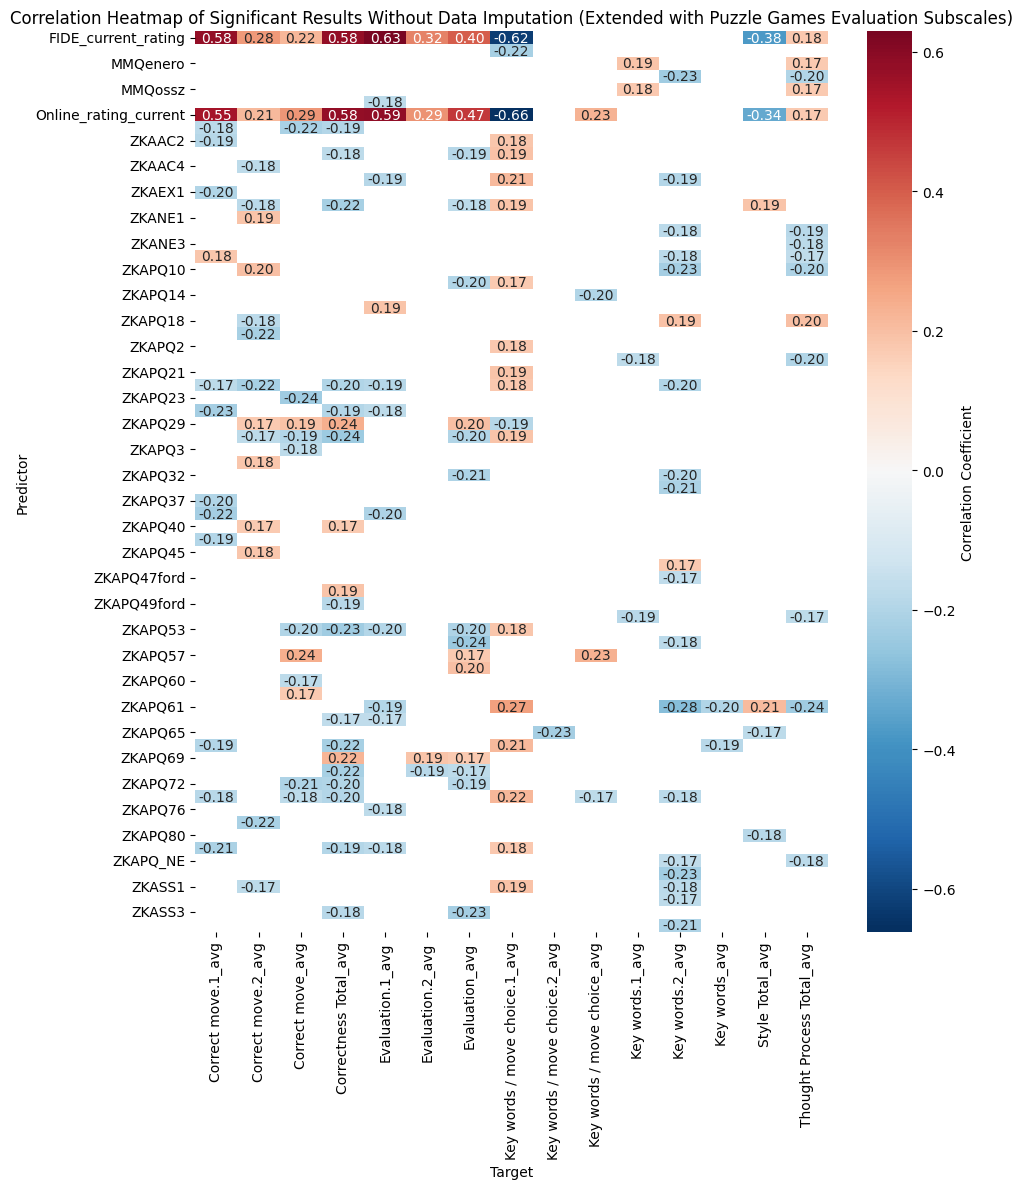

In [ ]:
pivot_df = pd.pivot_table(significant_results_df_all, 

                         values='Correlation',

                         index='Predictor', 

                         columns='Target')



# Create heatmap using seaborn

plt.figure(figsize=(10, 12))

sns.heatmap(pivot_df, 

            annot=True, 

            cmap='RdBu_r',

            center=0,

            fmt='.2f',

            cbar_kws={'label': 'Correlation Coefficient'})



plt.title('Correlation Heatmap of Significant Results Without Data Imputation (Extended with Puzzle Games Evaluation Subscales)')

plt.tight_layout()

plt.savefig('Figures/correlation_heatmap_significant_results_original_all_features.png')

plt.show()



In [ ]:
# Step 5: Group Comparisons (Exploratory) 

from scipy.stats import f_oneway

# Convert rating columns to numeric
for col in ['FIDE_peak_rating', 'FIDE_current_rating', 'Online_rating_current']:
    merged_df_augmented[col] = pd.to_numeric(merged_df_augmented[col], errors='coerce')

# Create tertile groups
rating_labels = ['Low', 'Medium', 'High']
for col in ['FIDE_peak_rating', 'FIDE_current_rating', 'Online_rating_current']:
    merged_df_augmented[f'{col}_group'] = pd.qcut(merged_df_augmented[col], q=3, labels=rating_labels)

display(merged_df_augmented)

# Select traits and puzzle metrics
comparison_cols = [col for col in merged_df_augmented.columns if col.startswith(('ZKA', 'MMQ', 'DERS'))]
comparison_cols += ['Correctness Total_avg', 'Style Total_avg', 'Thought Process Total_avg']

# Run ANOVA across each rating group
anova_results = []
for score_col in ['FIDE_peak_rating', 'FIDE_current_rating', 'Online_rating_current']:
    group_col = f'{score_col}_group'
    for trait in comparison_cols:
        groups = [merged_df_augmented[merged_df_augmented[group_col] == level][trait].dropna() for level in rating_labels]
        if all(len(g) > 1 for g in groups):
            stat, p = f_oneway(*groups)
            anova_results.append({
                'Rating Basis': score_col,
                'Trait': trait,
                'F-statistic': stat,
                'P-value': p
            })

anova_df = pd.DataFrame(anova_results).sort_values(by='P-value')

,ID,Correctness Total_avg,Style Total_avg,Thought Process Total_avg,FIDE_peak_rating,FIDE_current_rating,Online_rating_current,ZKAPQ1,ZKAPQ2,ZKAPQ3,...,MMQossz,MMQref,MMQenero,MMQkapcsossz,MMQkapcsdiszk,MMQbiz,DERS_ossz,FIDE_peak_rating_group,FIDE_current_rating_group,Online_rating_current_group
0,2,11.0,-1.50,-7.5,2205.0,2149.0,2180.0,2.0,1.0,3.0,...,127.0,40.0,25.0,18.0,10.0,9.0,43.0,High,High,High
1,3,15.0,2.50,-7.5,2475.0,2420.0,2525.0,1.0,3.0,2.0,...,113.0,35.0,21.0,19.0,14.0,13.0,30.0,High,High,High
2,4,2.0,2.50,-7.5,1200.0,750.0,750.0,1.0,1.0,1.0,...,116.0,27.0,27.0,17.0,11.0,14.0,20.0,Low,Low,Low
3,5,10.0,-3.50,-3.0,1349.0,1349.0,1349.0,1.0,3.0,1.0,...,107.0,24.0,28.0,6.0,11.0,11.0,42.0,Low,Medium,Low
4,6,8.0,2.50,-7.5,1750.0,1650.0,1780.0,3.0,2.0,2.0,...,109.0,31.0,24.0,20.0,12.0,15.0,51.0,High,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,328,6.0,4.25,-2.5,1766.0,1766.0,2100.0,4.0,3.0,3.0,...,115.0,37.0,23.0,21.0,17.0,13.0,36.0,High,High,High
264,329,5.0,4.75,-7.5,1338.0,1307.0,1498.0,1.0,3.0,1.0,...,140.0,39.0,30.0,19.0,9.0,9.0,16.0,Low,Low,Medium
265,330,0.0,-2.50,-5.0,1031.0,1031.0,1031.0,3.0,2.0,2.0,...,114.0,41.0,29.0,10.0,23.0,17.0,31.0,Low,Low,Low
266,332,2.0,3.00,-7.5,1595.0,1595.0,2000.0,4.0,1.0,1.0,...,93.0,36.0,17.0,12.0,19.0,17.0,61.0,Medium,Medium,High


In [ ]:
anova_df
# Save ANOVA results to CSV
anova_df.to_csv("Dataframes/anova_results.csv", index=False)


In [ ]:
anova_df

,Rating Basis,Trait,F-statistic,P-value
247,FIDE_current_rating,Correctness Total_avg,28.050016,8.917271e-12
372,Online_rating_current,Correctness Total_avg,23.803987,3.108646e-10
122,FIDE_peak_rating,Correctness Total_avg,20.662663,4.579768e-09
248,FIDE_current_rating,Style Total_avg,15.372394,4.825724e-07
361,Online_rating_current,ZKASS1,11.601894,1.478666e-05
...,...,...,...,...
364,Online_rating_current,ZKASS4,0.015794,9.843307e-01
181,FIDE_current_rating,ZKAPQ57,0.014128,9.859724e-01
269,Online_rating_current,ZKAPQ20,0.013461,9.866298e-01
294,Online_rating_current,ZKAPQ45,0.012676,9.874042e-01


In [ ]:
# LASSO regression for psychological traits predicting puzzle scores
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import numpy as np

# Prepare dataset
df = merged_df_short.copy()

# Define predictors: psychological traits only
psych_cols = [col for col in df.columns if col.startswith(('ZKA', 'MMQ', 'DERS'))]
X = df[psych_cols].apply(pd.to_numeric, errors='coerce')
X = X.dropna(axis=1)  # Drop predictors with missing values

# Drop rows with any missing values in predictors or targets
Y_targets = ['Correctness Total_avg', 'Style Total_avg', 'Thought Process Total_avg']
results = []

for y_col in Y_targets:
    df_model = pd.concat([X, df[y_col]], axis=1).dropna()
    X_clean = df_model[X.columns]
    y_clean = df_model[y_col]

    # LASSO with cross-validation
    lasso = make_pipeline(StandardScaler(), LassoCV(cv=5, random_state=42))
    lasso.fit(X_clean, y_clean)
    
    # Extract selected features
    coefs = lasso.named_steps['lassocv'].coef_
    selected_features = [(feature, coef) for feature, coef in zip(X.columns, coefs) if coef != 0]

    for feat, coef in selected_features:
        results.append({
            'Target': y_col,
            'Selected Predictor': feat,
            'Coefficient': coef
        })

lasso_df = pd.DataFrame(results).sort_values(by='Target')

In [ ]:
lasso_df
#print(len(lasso_df))

,Target,Selected Predictor,Coefficient
0,Correctness Total_avg,ZKAPQ22,-2.393967e-01
1,Correctness Total_avg,ZKAPQ24,-1.161476e-01
2,Correctness Total_avg,ZKAPQ29,4.258670e-01
3,Correctness Total_avg,ZKAPQ40,2.598994e-02
4,Correctness Total_avg,ZKAPQ53,-2.634160e-01
5,Correctness Total_avg,ZKAPQ59,2.097508e-01
6,Correctness Total_avg,ZKAPQ62,-1.856025e-02
7,Correctness Total_avg,ZKAPQ68,-1.315834e-01
8,Correctness Total_avg,ZKAPQ69,2.128882e-01
9,Correctness Total_avg,ZKAPQ72,-9.956316e-02
